In [1]:
class Cannon:
    def __init__(self, x0, y0, v, angle):
        """
        x0 and y0 are initial coordinates of the cannon
        v is the initial velocity
        angle is the angle of shooting in degrees
        """
        # Initial x and y coordinates of the missile
        self.x    = x0
        self.y    = y0
        # Initial value of velocity components
        self.vx  = v*cos(radians(angle)) # vx0
        self.vy  = v*sin(radians(angle)) # vy0

        # Acceleration along x and y axes
        self.ax   = 0    # ax = dvx/dy = Fx/m
        self.ay   = -9.8 # ay = dvy/dt = Fy/m
        # start time
        self.time = 0

        # these list will contain discrete set of missile coordinates
        self.xarr = [self.x]
        self.yarr = [self.y]
        
    def updateVx(self, dt):
        self.vx = self.vx + self.ax*dt
        return self.vx
    def updateVy(self, dt):
        self.vy = self.vy + self.ay*dt
        return self.vy
    
    def updateX(self, dt):
        #self.x = self.x + 0.5*(self.vx + self.updateVx(dt))*dt
        self.x = self.x + self.updateVx(dt)*dt
        return self.x
    def updateY(self, dt):
        #self.y = self.y + 0.5*(self.vy + self.updateVy(dt))*dt
        self.y = self.y + self.updateVy(dt)*dt
        return self.y
    
    def step(self, dt):
        self.xarr.append(self.updateX(dt))
        self.yarr.append(self.updateY(dt))
        self.time = self.time + dt

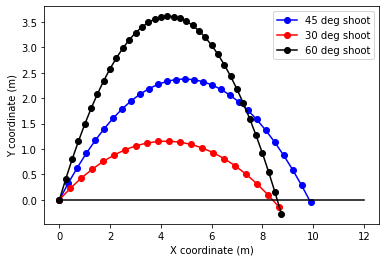

In [5]:
from math import sin, cos, radians
from matplotlib import pyplot as plt

def makeShoot(x0, y0, velocity, angle):
    """
    Returns a tuple with sequential pairs of x and y coordinates
    """
    cannon = Cannon(x0, y0, velocity, angle)
    dt = 0.05 # time step
    t = 0 # initial time
    cannon.step(dt)

    ###### THE  INTEGRATION ######
    while cannon.y >= 0:
        cannon.step(dt)
        t = t + dt
    ##############################

    return (cannon.xarr, cannon.yarr)

def main():
    x0 = 0
    y0 = 0
    velocity = 10 # m/s
    x45, y45 = makeShoot(x0, y0, velocity, 45)
    x30, y30 = makeShoot(x0, y0, velocity, 30)
    x60, y60 = makeShoot(x0, y0, velocity, 60)
    plt.plot(x45, y45, 'bo-', x30, y30, 'ro-', x60, y60, 'ko-',
        [0, 12], [0, 0], 'k-' # ground
        )
    plt.legend(['45 deg shoot', '30 deg shoot', '60 deg shoot'])
    plt.xlabel('X coordinate (m)')
    plt.ylabel('Y coordinate (m)')
    plt.show()

if __name__ == '__main__':
    main()